In [167]:
# to get the data, run mapanalysis.ts first with ts-node mapanalysis.ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
resources = ['wood', 'coal', 'uranium']

In [168]:
df = pd.read_json("mapgendist.json")

In [169]:
rows = []
for k in df.keys():
    for r in df[k]['resources']:
        rows.append((r['wood'], r['coal'], r['uranium'], r['woodTiles'], r['coalTiles'], r['uraniumTiles'], k))

In [170]:
data = pd.DataFrame(np.array(rows), columns=
                    ['wood', 'coal', 'uranium', 'woodTiles', 'coalTiles', 'uraniumTiles', 'size']
                   )

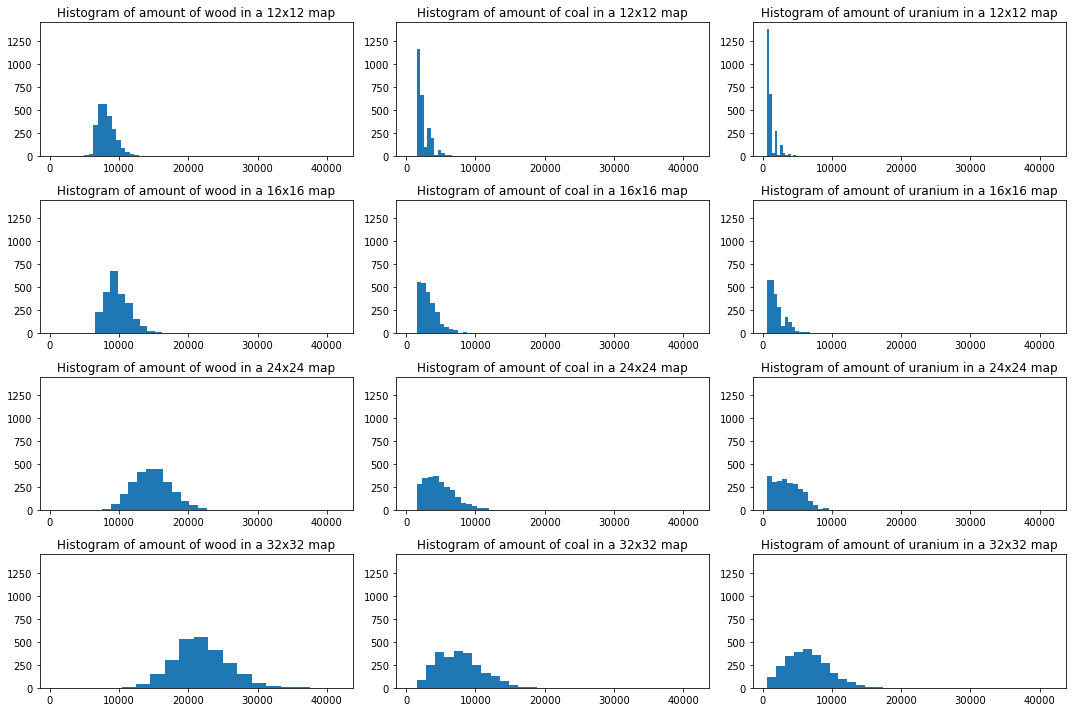

In [171]:
fig = plt.figure(figsize=(15,10))
ax = None
for j, size in enumerate([12,16,24,32]):

    for i, r in enumerate(resources):
        k = (i+1 + j*len(resources))
        ax = plt.subplot(4, 3, k, sharex=ax, sharey=ax)
        plt.hist(data[data['size'] == size][r], bins=15)
        plt.title(f"Histogram of amount of {r} in a {size}x{size} map")
plt.tight_layout()

In [172]:
data.groupby('size').describe()['woodTiles']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2555.0,15.771429,3.231750,8.0,14.0,16.0,18.0,30.0
16,2369.0,20.243985,4.847635,6.0,16.0,20.0,24.0,44.0
24,2580.0,34.625581,7.757929,14.0,30.0,34.0,40.0,68.0
32,2496.0,54.861378,10.967469,22.0,48.0,54.0,62.0,112.0


In [173]:
data.groupby('size').describe()['wood']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2555.0,8201.906849,1148.466500,3674.0,7474.0,8108.0,8916.0,13510.0
16,2369.0,9771.454622,1709.839102,2270.0,8404.0,9606.0,10884.0,18400.0
24,2580.0,14799.148062,2723.628570,7584.0,12903.5,14673.0,16571.5,26392.0
32,2496.0,21866.072917,3850.300423,10360.0,19324.0,21586.0,24286.5,41682.0


In [174]:
data.groupby('size').describe()['coal'] * 10

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,25550.0,23588.046967,9810.006273,15000.0,15720.0,22560.0,30080.0,90960.0
16,23690.0,31665.411566,14871.425641,15000.0,22160.0,30160.0,39240.0,114740.0
24,25800.0,49453.658915,23281.983411,15020.0,31060.0,46210.0,62835.0,134840.0
32,24960.0,77206.113782,32286.724422,15020.0,53775.0,74460.0,99030.0,215500.0


In [175]:
data.groupby('size').describe()['uranium'] * 40

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,102200.0,46096.876712,28831.355823,24000.0,25760.0,27680.0,53320.0,254960.0
16,94760.0,77789.345715,48444.969399,24000.0,48960.0,74240.0,104400.0,334480.0
24,103200.0,147996.744186,80114.595903,24000.0,79600.0,132520.0,203700.0,470800.0
32,99840.0,254484.647436,120512.501644,24080.0,158800.0,253680.0,335620.0,800720.0


In [176]:
data.groupby('size').describe()['uraniumTiles']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2555.0,3.553033,2.223739,2.0,2.0,2.0,4.0,20.0
16,2369.0,5.995779,3.731483,2.0,4.0,6.0,8.0,26.0
24,2580.0,11.401550,6.173276,2.0,6.0,10.0,16.0,36.0
32,2496.0,19.609776,9.278240,2.0,12.0,20.0,26.0,62.0
